In [85]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

### Esercizio 1.1

In [86]:
means = []
errorsMeans = []
filename = "lsn1.1_means.dat"
with open(filename, "r") as f:
    for line in f:
        mean, err = line.strip().split()
        means.append(float(mean))
        errorsMeans.append(float(err))
means = np.array(means)
errorsMeans = np.array(errorsMeans)

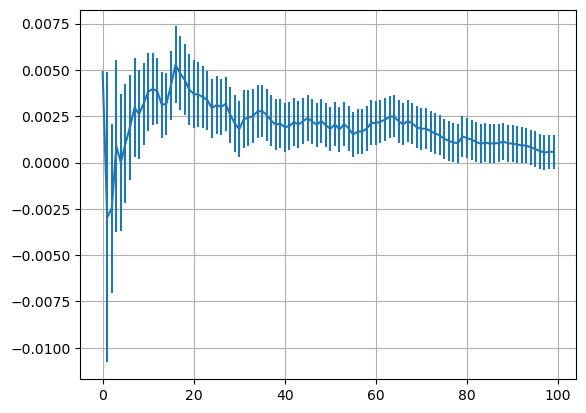

In [87]:
xs = np.arange(100)
plt.errorbar(x=xs, y=means-0.5, yerr=errorsMeans)
plt.grid()

In [88]:
variances = []
errorsVariances = []
filename = "lsn1.1_variances.dat"
with open(filename, "r") as f:
    for line in f:
        variance, err = line.strip().split()
        variances.append(float(variance))
        errorsVariances.append(float(err))
variances = np.array(variances)
errorsVariances = np.array(errorsVariances)

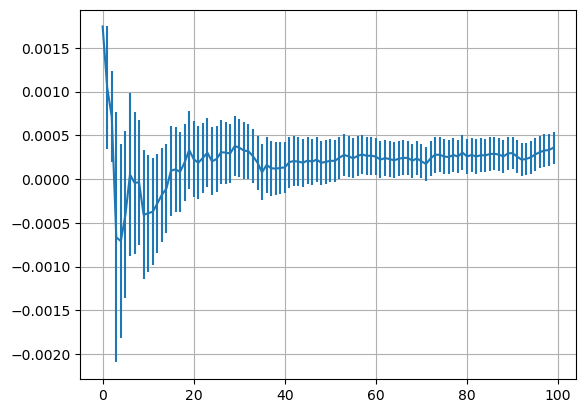

In [89]:
plt.errorbar(x=xs, y=variances-(1/12), yerr=errorsVariances)
plt.grid()

In [90]:
chi2s = []
with open("lsn1.1_chi2s.dat", "r") as f:
    for line in f:
        chi2s.append(float(line))

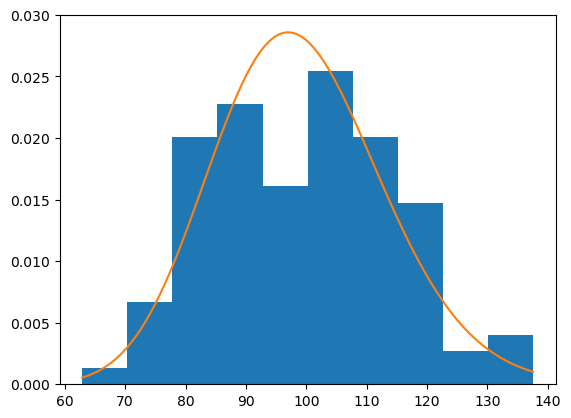

In [100]:
k = 99 #Gradi di libertà = numero di suddivisioni -1
__, bins, __ = plt.hist(chi2s, density=True)
ys = np.linspace(bins[0], bins[-1], 100)
plt.plot(ys, sp.stats.chi2.pdf(ys, df=k))

In [101]:
test_res = sp.stats.kstest(chi2s, sp.stats.chi2.cdf, args=(k,))
print("p-valore dal test di Kolmogorov-Smirnov:", test_res.pvalue)

p-valore dal test di Kolmogorov-Smirnov: 0.7208932775252282


### Esercizio 1.2

In [93]:
cauchy_lorentz = np.loadtxt("test_CL.dat")

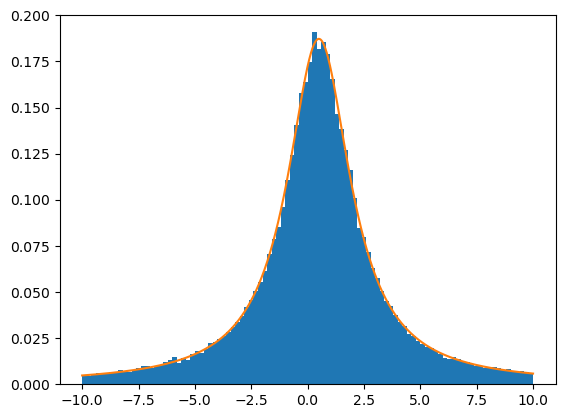

In [94]:
xs = np.linspace(-10, 10, 1000)
weight = 1/(len(cauchy_lorentz)*20/100)
hist, bins = np.histogram(cauchy_lorentz, range = (-10, 10), bins = 100, weights = len(cauchy_lorentz)*[weight])
plt.bar(bins[:-1], hist, width=20/100, align="edge")
plt.plot(xs, sp.stats.cauchy.pdf(xs, loc=0.5, scale=1.7), color="tab:orange")

In [95]:
exp = np.loadtxt("test_exp.dat")

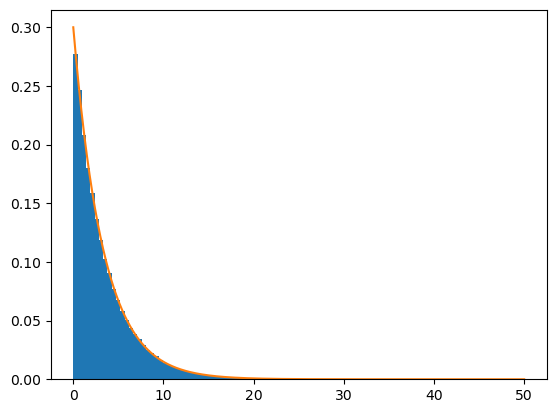

In [96]:
ys = np.linspace(0, 50, 1000)
plt.hist(exp, bins = 100, density=True)
plt.plot(ys, sp.stats.expon.pdf(ys, scale=1/0.3))

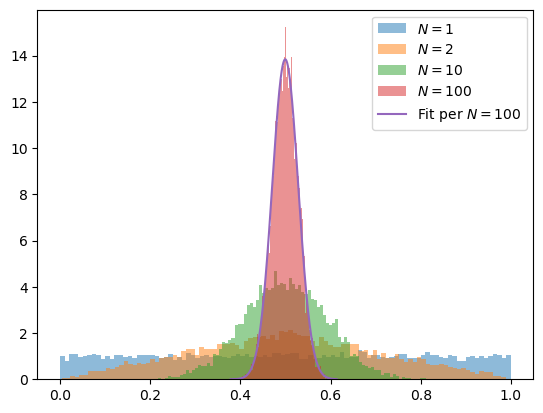

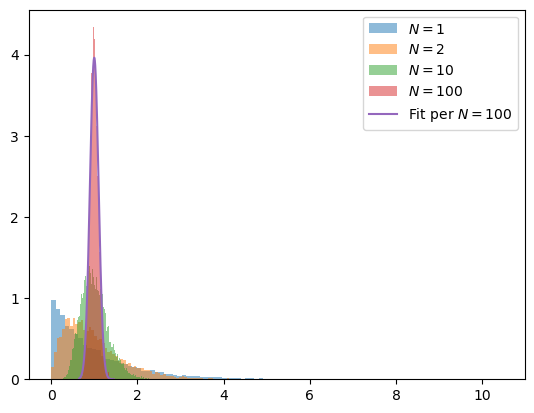

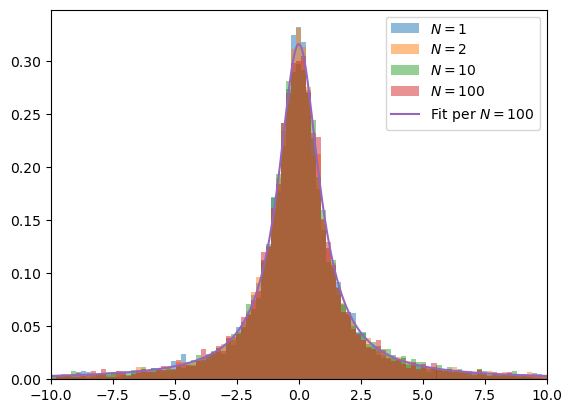

In [97]:
plots = [
    ("standard", "std_die.dat", 100, sp.stats.norm),
    ("exponential", "exp_die.dat", 100, sp.stats.norm),
    ("cauchy lorentz", "cauchy_die.dat", 0, sp.stats.cauchy)
]

for name, filename, bins, distro in plots:
    data = np.loadtxt(filename)
    if name == "cauchy lorentz":
        bins = np.concatenate(([data.min()], np.linspace(-10, 10, 100), [data.max()]))
    for i, N in zip(range(data.shape[-1]), [1, 2, 10, 100]):
        __, hist_bins, __ = plt.hist(data[:, i], density=True, bins=bins, alpha=0.5, label=f"$N={N}$")
    loc, scale = distro.fit(data[:, 3])
    if name == "cauchy lorentz":
        xmin, xmax = 10, -10
    else:
        xmin, xmax = hist_bins[0], hist_bins[-1]
    xs = np.linspace(xmin, xmax, 1000)
    plt.plot(xs, distro.pdf(xs, loc, scale), label = "Fit per $N=100$")
    if name == "cauchy lorentz":
        plt.xlim(-10, 10)
    plt.legend()
    plt.show()

### Esercizio 3

In [98]:
pi, error = np.loadtxt("pi.dat", unpack=True)

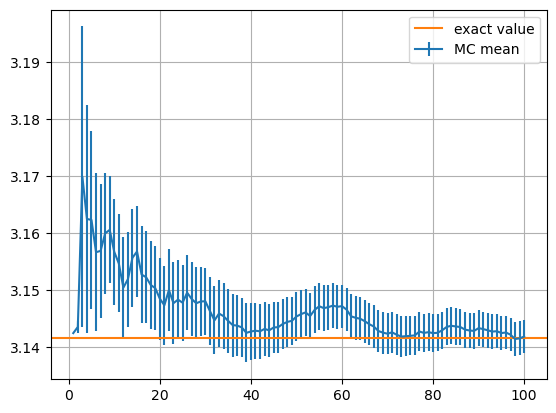

In [99]:
plt.errorbar(np.arange(1,101), pi, yerr=error, label="MC mean")
plt.axhline(np.pi, color="tab:orange", label="exact value")
plt.grid()
plt.legend()